## Importations

In [1]:
# Utils
import mne
import os
import pickle
import argparse
from src.utils import get_bids_file, compute_ch_adjacency
from src.params import RESULT_PATH, SUBJ_CLEAN, ACTIVE_RUN, FIG_PATH, EVENTS_ID, PREPROC_PATH, PASSIVE_RUN

# Stats
from mne.stats import spatio_temporal_cluster_test, combine_adjacency, spatio_temporal_cluster_1samp_test
import numpy as np
from scipy.stats import sem
import scipy.stats

# Visualization
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mne.viz import plot_compare_evokeds
from matplotlib.backends.backend_pdf import PdfPages 


## Select parameters of interest

In [2]:
# Select what conditions to compute
task = "LaughterPassive"
cond1 = "LaughReal"
cond2 = "LaughPosed"
conditions = cond1 + '-' + cond2
condition_list = [cond1, cond2]
event_id = dict()
picks = "meg" # Select MEG channels

print("=> Process task :", task, "for conditions :", cond1, "&", cond2)

=> Process task : LaughterPassive for conditions : LaughReal & LaughPosed


## Import files of interest : 
- File with clusters
- File with contrast

In [3]:
# Import ERP files path

_, save_clusters_stats = get_bids_file(RESULT_PATH, stage="erp-clusters", task=task, measure="Ttest-clusters", condition=conditions)

_, save_contrast = get_bids_file(RESULT_PATH, stage="erp-contrast", task=task, condition=conditions)

with open(save_clusters_stats, 'rb') as f:
    cluster_stats = pickle.load(f)

with open(save_contrast, 'rb') as f:
    contrast = pickle.load(f)

## Select evoked of interest

In [4]:
evoked_condition1 = []
evoked_condition2 = []

for subj in SUBJ_CLEAN :
    print("processing -->", subj)
    #_, path_evoked = get_bids_file(PREPROC_PATH, task=task, subj=subj, stage="ave")
    #evoked = mne.read_evokeds(path_evoked, verbose=None)
    
    # NOTE : ADD AUTOREJECT THRESHOLD
    _, path_epochs = get_bids_file(RESULT_PATH, task=task, subj=subj, stage="AR_epo")
    epochs_AR = mne.read_epochs(path_epochs, verbose=None)
    epochs_AR.filter(1, 30)
    
    # Drop EEg channels and equalize event number
    evoked_condition1.append(epochs_AR[cond1].average())
    evoked_condition2.append(epochs_AR[cond2].average())

# Prepare data for plotting
evokeds = {'Spontaneous Laughter' : evoked_condition1, 'Volitional Laughter' : evoked_condition2}

processing --> 01
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-01/sub-01_task-LaughterPassive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
200 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_835018/1562034691.py:12: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_AR.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 54000 out of 54000 | elapsed:   22.6s finished


processing --> 02
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-02/sub-02_task-LaughterPassive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
195 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_835018/1562034691.py:12: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_AR.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 52650 out of 52650 | elapsed:   22.2s finished


processing --> 03
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-03/sub-03_task-LaughterPassive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
200 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_835018/1562034691.py:12: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_AR.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 54000 out of 54000 | elapsed:   22.2s finished


processing --> 04
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-04/sub-04_task-LaughterPassive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
192 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_835018/1562034691.py:12: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_AR.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 51840 out of 51840 | elapsed:   21.7s finished


processing --> 05
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-05/sub-05_task-LaughterPassive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
200 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_835018/1562034691.py:12: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_AR.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 54000 out of 54000 | elapsed:   22.6s finished


processing --> 06
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-06/sub-06_task-LaughterPassive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
200 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_835018/1562034691.py:12: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_AR.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 54000 out of 54000 | elapsed:   22.7s finished


processing --> 07
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-07/sub-07_task-LaughterPassive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
198 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_835018/1562034691.py:12: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_AR.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 53460 out of 53460 | elapsed:   21.9s finished


processing --> 08
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-08/sub-08_task-LaughterPassive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
197 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_835018/1562034691.py:12: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_AR.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 53190 out of 53190 | elapsed:   21.5s finished


processing --> 09
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-09/sub-09_task-LaughterPassive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
200 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_835018/1562034691.py:12: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_AR.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 54000 out of 54000 | elapsed:   21.9s finished


processing --> 10
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-10/sub-10_task-LaughterPassive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
199 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_835018/1562034691.py:12: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_AR.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 53730 out of 53730 | elapsed:   22.3s finished


processing --> 11
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-11/sub-11_task-LaughterPassive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
154 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_835018/1562034691.py:12: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_AR.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 41580 out of 41580 | elapsed:   16.9s finished


processing --> 12
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-12/sub-12_task-LaughterPassive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
192 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_835018/1562034691.py:12: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_AR.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 51840 out of 51840 | elapsed:   21.9s finished


processing --> 13
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-13/sub-13_task-LaughterPassive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
199 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_835018/1562034691.py:12: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_AR.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 53730 out of 53730 | elapsed:   22.2s finished


processing --> 14
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-14/sub-14_task-LaughterPassive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
196 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_835018/1562034691.py:12: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_AR.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 52920 out of 52920 | elapsed:   22.0s finished


processing --> 15
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-15/sub-15_task-LaughterPassive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
200 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_835018/1562034691.py:12: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_AR.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 54000 out of 54000 | elapsed:   22.2s finished


processing --> 16
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-16/sub-16_task-LaughterPassive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
194 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_835018/1562034691.py:12: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_AR.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 52380 out of 52380 | elapsed:   22.1s finished


processing --> 18
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-18/sub-18_task-LaughterPassive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
185 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_835018/1562034691.py:12: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_AR.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 49950 out of 49950 | elapsed:   20.5s finished


processing --> 19
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-19/sub-19_task-LaughterPassive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
199 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_835018/1562034691.py:12: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_AR.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 53730 out of 53730 | elapsed:   21.9s finished


processing --> 20
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-20/sub-20_task-LaughterPassive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
192 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_835018/1562034691.py:12: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_AR.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 51840 out of 51840 | elapsed:   21.6s finished


processing --> 21
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-21/sub-21_task-LaughterPassive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
199 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_835018/1562034691.py:12: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_AR.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 53730 out of 53730 | elapsed:   22.3s finished


processing --> 22
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-22/sub-22_task-LaughterPassive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
200 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_835018/1562034691.py:12: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_AR.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 54000 out of 54000 | elapsed:   22.3s finished


processing --> 23
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-23/sub-23_task-LaughterPassive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
190 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_835018/1562034691.py:12: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_AR.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 51300 out of 51300 | elapsed:   21.4s finished


processing --> 24
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-24/sub-24_task-LaughterPassive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
197 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_835018/1562034691.py:12: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_AR.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 53190 out of 53190 | elapsed:   22.0s finished


processing --> 25
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-25/sub-25_task-LaughterPassive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
199 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_835018/1562034691.py:12: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_AR.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 53730 out of 53730 | elapsed:   22.6s finished


processing --> 28
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-28/sub-28_task-LaughterPassive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
200 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_835018/1562034691.py:12: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_AR.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 54000 out of 54000 | elapsed:   22.3s finished


processing --> 30
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-30/sub-30_task-LaughterPassive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
200 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_835018/1562034691.py:12: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_AR.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 54000 out of 54000 | elapsed:   23.0s finished


processing --> 32
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-32/sub-32_task-LaughterPassive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
197 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_835018/1562034691.py:12: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_AR.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 53190 out of 53190 | elapsed:   21.9s finished


## Visualization of cluster

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


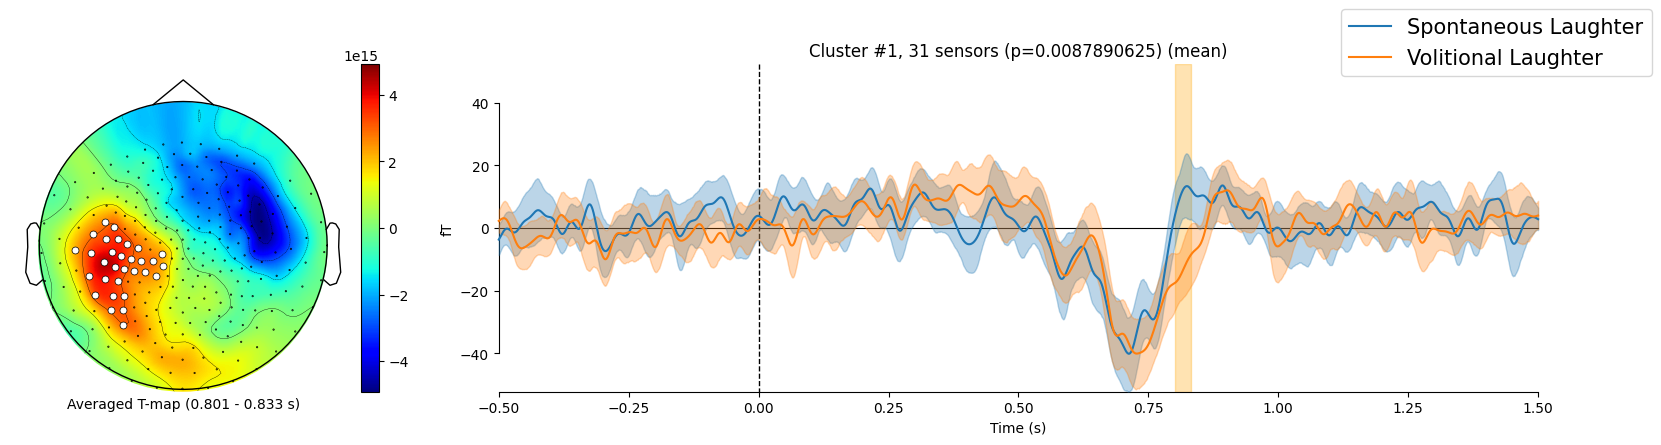

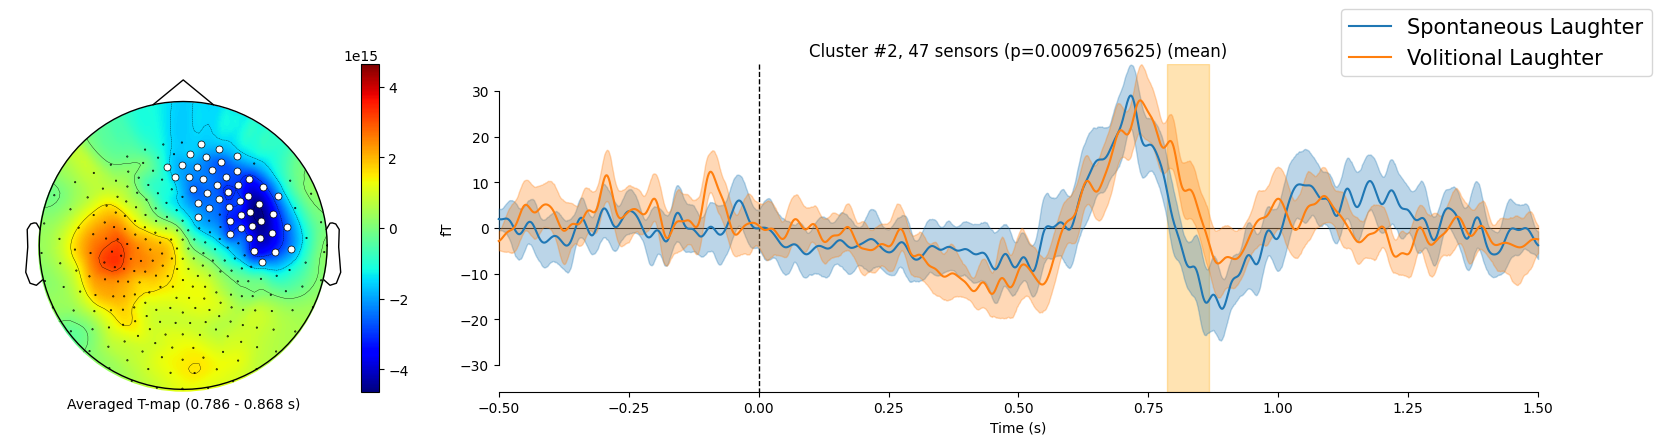

In [5]:
"""
Code adapted from : 
https://mne.tools/stable/auto_tutorials/stats-sensor-space/75_cluster_ftest_spatiotemporal.html
"""
T_obs, clusters, p_values, _ = cluster_stats

p_accept = 0.01
good_cluster_inds = np.where(p_values < p_accept)[0]

# configure variables for visualization
colors = "steelblue",'orange'
linestyles = '-', '--'

times = contrast.times * 1e3

# loop over clusters
for i_clu, clu_idx in enumerate(good_cluster_inds):
    
    # unpack cluster information, get unique indices
    time_inds, space_inds = np.squeeze(clusters[clu_idx])
    ch_inds = np.unique(space_inds)
    time_inds = np.unique(time_inds)
    

    sig_times = contrast.times[time_inds]

    # get topography for F stat
    t_map = T_obs[time_inds, ...].mean(axis=0)

    # get signals at the sensors contributing to the cluster
    sig_times = contrast.times[time_inds]

    # create spatial mask
    mask = np.zeros((t_map.shape[0], 1), dtype=bool)
    mask[ch_inds, :] = True

    # initialize figure
    fig, ax_topo = plt.subplots(1, 1, figsize=(17, 5))

    # plot average test statistic and mark significant sensors
    t_evoked = mne.EvokedArray(t_map[:, np.newaxis], contrast.info, tmin=0)

    t_evoked = mne.EvokedArray(t_map[:, np.newaxis], contrast.info, tmin=0)

    t_evoked.plot_topomap(times=0, mask=mask, axes=ax_topo, cmap='jet',
                          cnorm = matplotlib.colors.CenteredNorm(vcenter=0), show=False,
                          colorbar=False, mask_params=dict(markersize=10), extrapolate='head',
                         sphere=(0, 0.01, 0, 0.184))

    image = ax_topo.images[0]

    # remove the title that would otherwise say "0.000 s"
    ax_topo.set_title("")

    # create additional axes (for ERF and colorbar)
    divider = make_axes_locatable(ax_topo)
    
    # add axes for colorbar
    ax_colorbar = divider.append_axes('right', size='5%', pad=0.05)
    plt.colorbar(image, cax=ax_colorbar)
    ax_topo.set_xlabel(
        'Averaged T-map ({:0.3f} - {:0.3f} s)'.format(*sig_times[[0, -1]]))

    # add new axis for time courses and plot time courses
    ax_signals = divider.append_axes('right', size='300%', pad=1.2)

    # TODO add color for noise around signal
    title = 'Cluster #{0}, {1} sensors (p={2})'.format(i_clu + 1, len(ch_inds), p_values[clu_idx])
    
    plot_compare_evokeds(evokeds, title=title, picks=ch_inds, axes=ax_signals, show=False,
                     split_legend=True, truncate_yaxis='auto', combine="mean")
    
    plt.legend(fontsize="15", loc='upper left', bbox_to_anchor=(0.80, 1.2))
    
    # plot temporal cluster extent
    ymin, ymax = ax_signals.get_ylim()
    ax_signals.fill_betweenx((ymin, ymax), sig_times[0], sig_times[-1],
                         color='orange', alpha=0.3)
    # clean up viz
    mne.viz.tight_layout(fig=fig)
    fig.subplots_adjust(bottom=.05)
    plt.savefig(FIG_PATH + 'clusters-erp/sub-all_run-all_task-{}_cond-{}_meas-Ttest-cluster_erp{}.png'.format(task, conditions, i_clu))

## Plot topomaps of activity

In [27]:
evoked_condition1 = []
evoked_condition2 = []

T_obs, clusters, p_values, _ = cluster_stats

p_accept = 0.01
good_cluster_inds = np.where(p_values < p_accept)[0]


for subj in SUBJ_CLEAN :
    print("processing -->", subj)

    _, path_epochs = get_bids_file(RESULT_PATH, task=task, subj=subj, stage="AR_epo")
    epochs_AR = mne.read_epochs(path_epochs, verbose=None)

    # Drop EEg channels and equalize event number
    evoked_condition1.append(epochs_AR[cond1].average())
    evoked_condition2.append(epochs_AR[cond2].average())

# Prepare data for plotting
evokeds = {'Spontaneous Laughter' : evoked_condition1, 'Volitional Laughter' : evoked_condition2}  

processing --> 01
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-01/sub-01_task-LaughterPassive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
200 matching events found
No baseline correction applied
0 projection items activated
processing --> 02
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-02/sub-02_task-LaughterPassive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
195 matching events found
No baseline correction applied
0 projection items activated
processing --> 03
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-03/sub-03_task-LaughterPassive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matri

190 matching events found
No baseline correction applied
0 projection items activated
processing --> 24
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-24/sub-24_task-LaughterPassive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
197 matching events found
No baseline correction applied
0 projection items activated
processing --> 25
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-25/sub-25_task-LaughterPassive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
199 matching events found
No baseline correction applied
0 projection items activated
processing --> 28
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-28/sub-28_task-LaughterPassive_run-all_AR_epo.fif ...
    Found the data 

Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-32/sub-32_task-LaughterPassive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
197 matching events found
No baseline correction applied
0 projection items activated
Spontaneous Laughter
(27, 270, 2401)
(270, 2401)
Volitional Laughter
(54, 270, 2401)
(270, 2401)


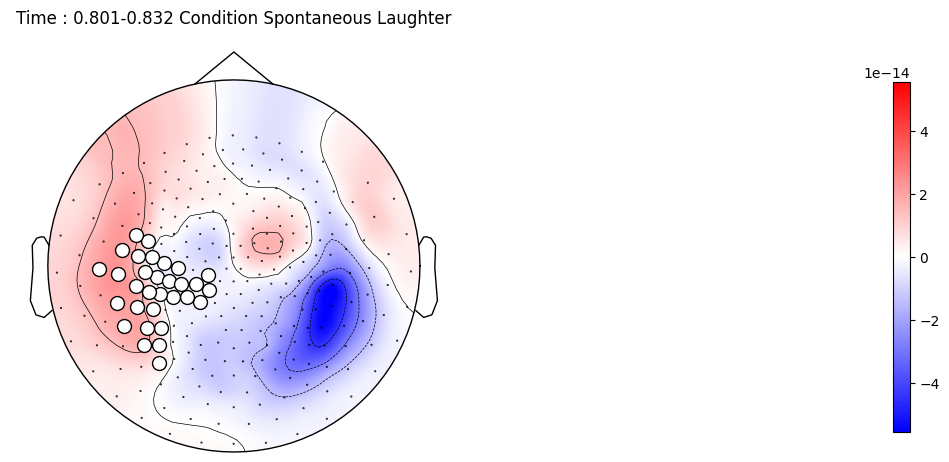

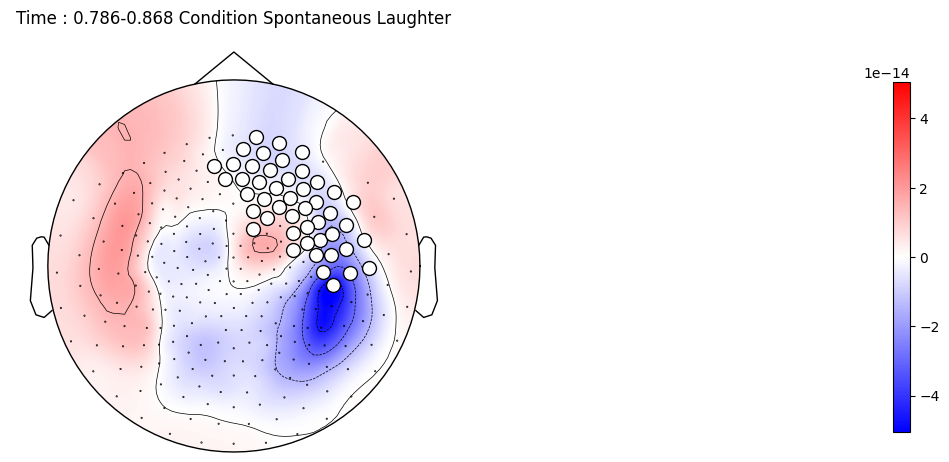

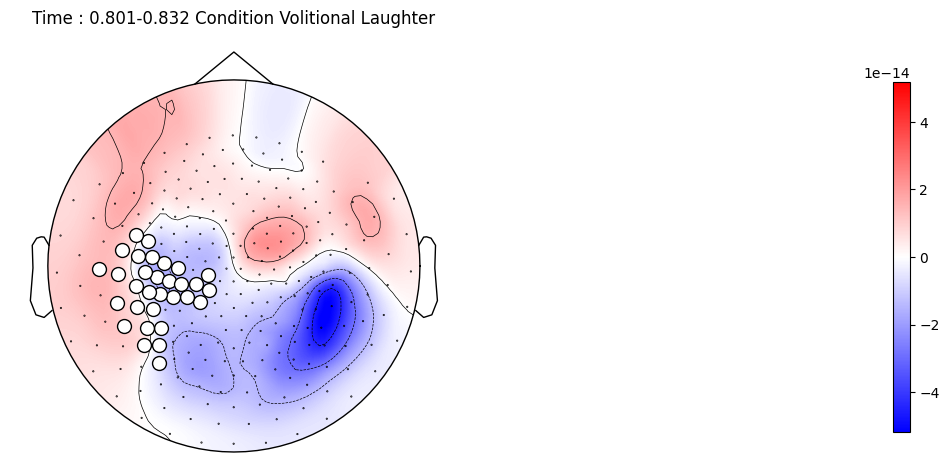

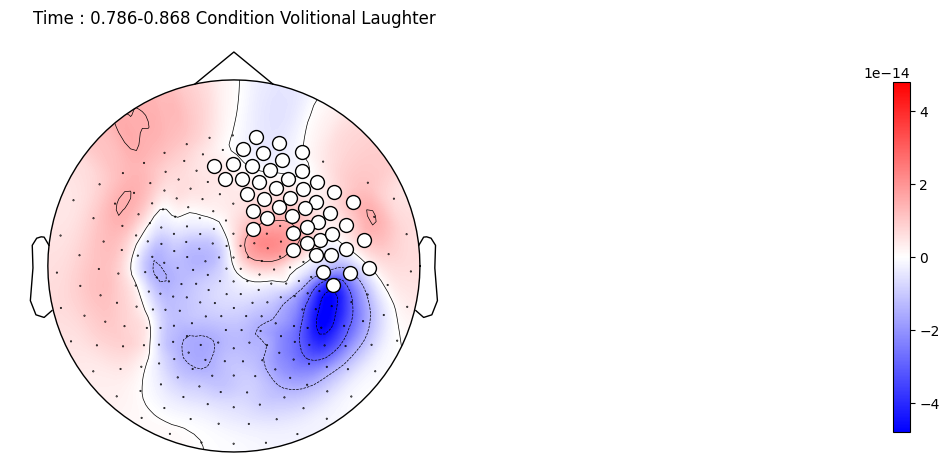

In [28]:
times = contrast.times * 1e3
evk_data = []

_, path_epochs = get_bids_file(RESULT_PATH, task=task, subj=subj, stage="AR_epo")
epochs = mne.read_epochs(path_epochs, verbose=None)

filename = 'clusters-erp/sub-all_task-{}_run-all_cond-{}_meas-cluster-topomap_only.pdf'.format(task, conditions)
pdf = PdfPages(FIG_PATH + filename)

for cond in evokeds : # For each condition
    print(cond)
    # Average evokeds 
    for evk in evokeds[cond] : 
        evk_data.append(evk.data)
        
    print(np.array(evk_data).shape)  
    
    evk = np.mean(np.array(evk_data), axis=0)
    print(evk.shape)
    # loop over clusters
    for i_clu, clu_idx in enumerate(good_cluster_inds):

        # unpack cluster information, get unique indices
        time_inds, space_inds = np.squeeze(clusters[clu_idx])
        ch_inds = np.unique(space_inds)
        time_inds = np.unique(time_inds)

        sig_times = contrast.times[time_inds]

        # get topography 
        t_map = evk[..., time_inds].mean(axis=1)

        # get signals at the sensors contributing to the cluster
        sig_times = contrast.times[time_inds]

        # create spatial mask
        mask = np.zeros((t_map.shape[0], 1), dtype=bool)
        mask[ch_inds, :] = True

        # initialize figure
        fig, ax_topo = plt.subplots(1, 1, figsize=(17, 5))
        
        tmin = round(sig_times[0], 3)
        tmax = round(sig_times[-1], 3)
        
        img, _ = mne.viz.plot_topomap(t_map, epochs.info, show=False, axes=ax_topo,
                        cmap='bwr', extrapolate='head',
                        sphere=(0, 0.0, 0, 0.19), mask=mask,
                         mask_params=dict(markersize=10))

        title = f'Time : {tmin}-{tmax} Condition {cond}'
        ax_topo.set_title(title)    
        
        # Add colorbar
        fig.subplots_adjust(right=0.8)
        cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
        fig.colorbar(img, cax=cbar_ax)
        
        plt.savefig(pdf, format='pdf')
        
pdf.close()


## Control conditions
This part of the code was created to manipulate conditions and being able to merge conditions together

Note : Here we compute again the cluster-permutation test. It is recommanded to save files after merging conditions

In [3]:
task = "LaughterPassive"
run_list = PASSIVE_RUN
control_events = ['EnvReal', 'EnvPosed']
events_list = ['LaughPosed', 'LaughPosed']
meas = 'beta'
conditions = 'LaghReal-LaughPosed'

In [5]:
contrasts_all_subject = []

evoked_list1 = []
evoked_list2 = []

plot_list1 = []
plot_list2 = []

for subj in SUBJ_CLEAN :
    print("processing -->", subj)
    
    evoked_per_subject = []

    for run in ['02', '03'] : 
        
        path_epochs = "/home/claraelk/scratch/laughter_data/preproc_bids_data/sub-{}/ses-recording/meg/sub-{}_ses-recording_task-{}_run-{}_{}.fif".format(subj, subj, task, run, 
                                                                'clean-epo')# get_bids_file(PREPROC_PATH, task=task, subj=subj, run=run, stage="clean-epo")
        epochs = mne.read_epochs(path_epochs, verbose=None)
        
        # Drop EEg channels and equalize event number
        for controls in control_events :
            evoked_list1.append(epochs[controls].average())

        for ev in events_list : 
            evoked_list2.append(epochs[ev].average())

    evokeds_control = mne.combine_evoked(evoked_list1, weights = 'equal')
    evokeds_laugh = mne.combine_evoked(evoked_list2, weights = 'equal')

    contrast = mne.combine_evoked([evokeds_control, evokeds_laugh], weights=[1, -1])
    contrast.pick_types(meg=True, ref_meg=False,  exclude='bads')
    contrasts_all_subject.append(contrast)

# Combine all subject together
evoked_contrast = mne.combine_evoked(contrasts_all_subject, 'equal')

# Compute adjacency by using compute_ch_adjacency function
# as we have 270 channels and not 275 as the CTF275 template provide
print('Computing adjacency.')
adjacency, ch_names = compute_ch_adjacency(evoked_contrast.info, ch_type='mag')
print(adjacency.shape)

# Obtain the data as a 3D matrix and transpose it such that
# the dimensions are as expected for the cluster permutation test:
# n_epochs × n_times × n_channels
X = np.array([c.data for c in contrasts_all_subject])
X = np.transpose(X, [0, 2, 1])
print(X.shape)

degrees_of_freedom = len(contrasts_all_subject) - 1
t_thresh = scipy.stats.t.ppf(1 - 0.001 / 2, df=degrees_of_freedom)

# Run the analysis
print('Clustering.')
cluster_stats = \
    spatio_temporal_cluster_1samp_test(X, n_permutations=1024,
                                threshold=None, tail=0,
                                adjacency=adjacency,
                                out_type='indices', verbose=None, 
                                step_down_p = 0.05, check_disjoint=True)

T_obs, clusters, cluster_p_values, H0 = cluster_stats

good_cluster_inds = np.where(cluster_p_values < 0.01)[0]
print("Good clusters: %s" % good_cluster_inds)

evokeds = {'Scramble' : evoked_list1, 'Laughter' : evoked_list2}

# Save cluster stats to use it later
# TODO : save all subject evoked_cond1 et cond2 

'''conditions = 'Button-Laugh'


_, save_contrasts = get_bids_file(RESULT_PATH, stage = "erp-contrast", task=task, condition = conditions)

_, save_cluster_stats = get_bids_file(RESULT_PATH, stage = "erp-clusters", task=task, measure="Ttest-clusters", condition = conditions)

with open(save_contrasts, 'wb') as f:
    pickle.dump(contrast, f)  

with open(save_cluster_stats, 'wb') as f:
    pickle.dump(cluster_stats, f)'''

processing --> 01
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-01/ses-recording/meg/sub-01_ses-recording_task-LaughterPassive_run-02_clean-epo.fif ...
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-01/ses-recording/meg/sub-01_ses-recording_task-LaughterPassive_run-03_clean-epo.fif ...
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
processing --> 02
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-02/ses-recording/meg/sub-02_ses-recording_task-LaughterPassive_run-02_clean-epo.fif ...
    Found the data of interest:
        t =   -15

    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
49 matching events found
No baseline correction applied
0 projection items activated
processing --> 12
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-12/ses-recording/meg/sub-12_ses-recording_task-LaughterPassive_run-02_clean-epo.fif ...
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-12/ses-recording/meg/sub-12_ses-recording_task-LaughterPassive_run-03_clean-epo.fif ...
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activat

        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
46 matching events found
No baseline correction applied
0 projection items activated
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-23/ses-recording/meg/sub-23_ses-recording_task-LaughterPassive_run-03_clean-epo.fif ...
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
processing --> 24
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-24/ses-recording/meg/sub-24_ses-recording_task-LaughterPassive_run-02_clean-epo.fif ...
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
Reading /home/claraelk/scratc

  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 2 clusters to exclude from subsequent iterations


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 1 additional cluster to exclude from subsequent iterations


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #3 found 0 additional clusters to exclude from subsequent iterations
Good clusters: [  0 550]


'conditions = \'Button-Laugh\'\n\n\n_, save_contrasts = get_bids_file(RESULT_PATH, stage = "erp-contrast", task=task, condition = conditions)\n\n_, save_cluster_stats = get_bids_file(RESULT_PATH, stage = "erp-clusters", task=task, measure="Ttest-clusters", condition = conditions)\n\nwith open(save_contrasts, \'wb\') as f:\n    pickle.dump(contrast, f)  \n\nwith open(save_cluster_stats, \'wb\') as f:\n    pickle.dump(cluster_stats, f)'

In [22]:

_, save_contrasts = get_bids_file(RESULT_PATH, stage = "erp-contrast", task=task, condition = conditions)

_, save_cluster_stats = get_bids_file(RESULT_PATH, stage = "erp-clusters", task=task, measure="Ttest-clusters", condition = conditions)

with open(save_contrasts, 'rb') as f:
    contrast = pickle.load(f)  

with open(save_cluster_stats, 'rb') as f:
    cluster_stats=pickle.load(f)

In [30]:
# Prepare data for plotting

evoked_list1 = []
evoked_list2 = []

for subj in SUBJ_CLEAN :
    
    for run in ['02', '03'] : 
        print("processing -->", subj)
        path_epochs = "/home/claraelk/scratch/laughter_data/preproc_bids_data/sub-{}/ses-recording/meg/sub-{}_ses-recording_task-{}_run-{}_{}.fif".format(subj, subj, task, run, 
                                                                'clean-epo')#get_bids_file(RESULT_PATH, task=task, subj=subj, run=run, stage="psd_epo", measure='alpha')
        epochs = mne.read_epochs(path_epochs, verbose=None)

        # Drop EEg channels and equalize event number
        for controls in control_events :
            epochs_controls = epochs[controls].average()
            #epochs_controls.filter(1, 30)
            evoked_list1.append(epochs_controls)

        for ev in events_list : 
            epochs_laughter = epochs[ev].average()
            #epochs_laughter.filter(1, 30)
            evoked_list2.append(epochs_laughter)

evokeds = {'Envelop' : evoked_list1, 'Laughter' : evoked_list2}

processing --> 01
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-01/ses-recording/meg/sub-01_ses-recording_task-LaughterPassive_run-02_clean-epo.fif ...
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
processing --> 01
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-01/ses-recording/meg/sub-01_ses-recording_task-LaughterPassive_run-03_clean-epo.fif ...
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
processing --> 02
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-02/ses-recording/meg/sub-02_ses-recording_task-LaughterPassive_run-02_clean-epo.fif ...
    Found the data of interest:

        0 CTF compensation matrices available
Not setting metadata
47 matching events found
No baseline correction applied
0 projection items activated
processing --> 11
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-11/ses-recording/meg/sub-11_ses-recording_task-LaughterPassive_run-03_clean-epo.fif ...
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
49 matching events found
No baseline correction applied
0 projection items activated
processing --> 12
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-12/ses-recording/meg/sub-12_ses-recording_task-LaughterPassive_run-02_clean-epo.fif ...
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
processing --> 12
Reading /home/claraelk/scratch/lau

    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
processing --> 23
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-23/ses-recording/meg/sub-23_ses-recording_task-LaughterPassive_run-02_clean-epo.fif ...
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
46 matching events found
No baseline correction applied
0 projection items activated
processing --> 23
Reading /home/claraelk/scratch/laughter_data/preproc_bids_data/sub-23/ses-recording/meg/sub-23_ses-recording_task-LaughterPassive_run-03_clean-epo.fif ...
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Not setting metadata
37 matching events found
No baseline correction applied
0 projec

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


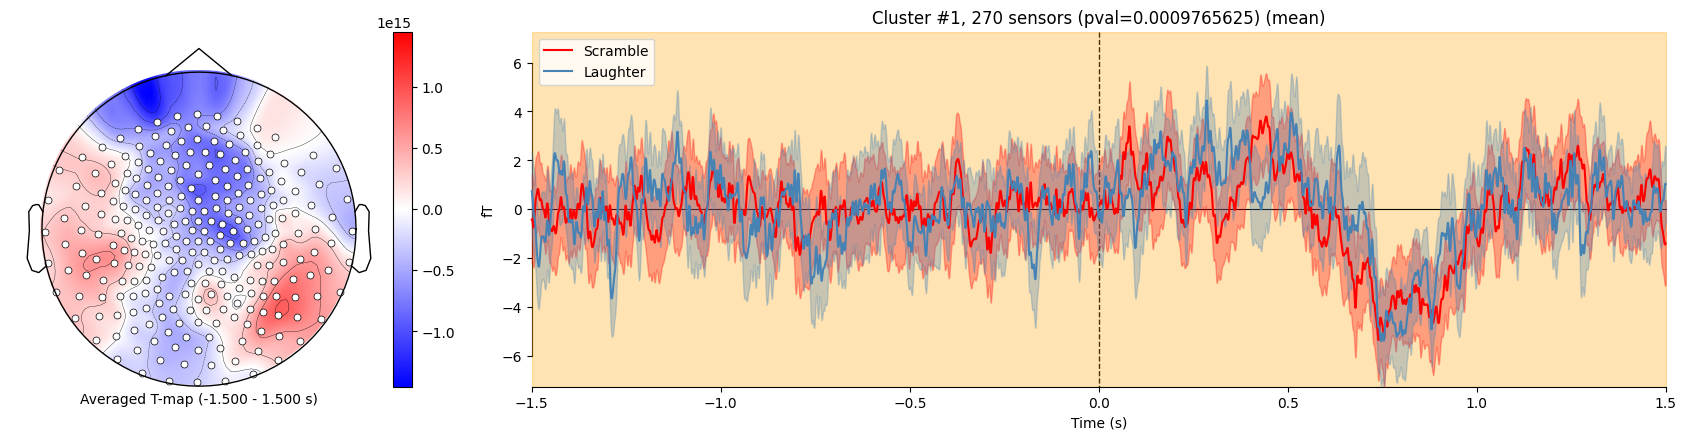

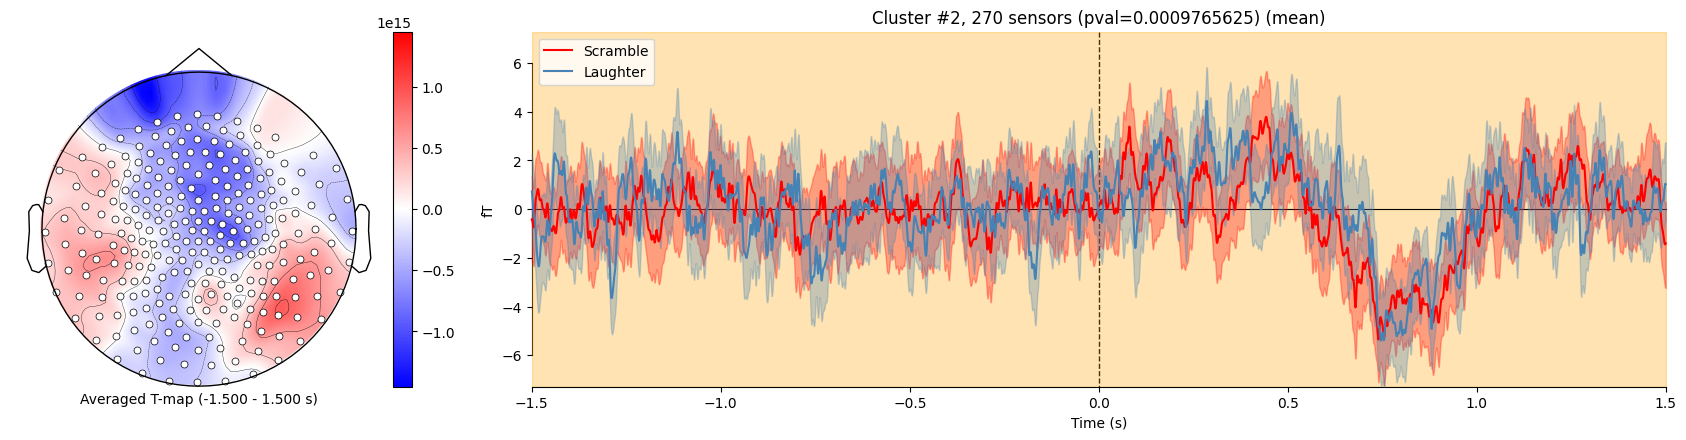

In [4]:
"""
Code adapted from : 
https://mne.tools/stable/auto_tutorials/stats-sensor-space/75_cluster_ftest_spatiotemporal.html
"""
T_obs, clusters, p_values, _ = cluster_stats

p_accept = 0.001
good_cluster_inds = np.where(p_values < p_accept)[0]

# configure variables for visualization
colors = "r",'steelblue'
linestyles = '-', '--'

times = contrast.times * 1e3

# loop over clusters
for i_clu, clu_idx in enumerate(good_cluster_inds):
    
    # unpack cluster information, get unique indices
    time_inds, space_inds = np.squeeze(clusters[clu_idx])
    ch_inds = np.unique(space_inds)
    time_inds = np.unique(time_inds)
    

    sig_times = contrast.times[time_inds]

    # get topography for F stat
    t_map = T_obs[time_inds, ...].mean(axis=0)

    # get signals at the sensors contributing to the cluster
    sig_times = contrast.times[time_inds]

    # create spatial mask
    mask = np.zeros((t_map.shape[0], 1), dtype=bool)
    mask[ch_inds, :] = True

    # initialize figure
    fig, ax_topo = plt.subplots(1, 1, figsize=(17, 5))

    # plot average test statistic and mark significant sensors
    t_evoked = mne.EvokedArray(t_map[:, np.newaxis], contrast.info, tmin=0)

    t_evoked.plot_topomap(times=0, mask=mask, axes=ax_topo, cmap='bwr',
                          cnorm = matplotlib.colors.CenteredNorm(vcenter=0), show=False,
                          colorbar=False, mask_params=dict(markersize=10), extrapolate='head',
                         sphere=(0, 0.017, 0, 0.185))

    image = ax_topo.images[0]

    # remove the title that would otherwise say "0.000 s"
    ax_topo.set_title("")

    # create additional axes (for ERF and colorbar)
    divider = make_axes_locatable(ax_topo)
    
    # add axes for colorbar
    ax_colorbar = divider.append_axes('right', size='5%', pad=0.05)
    plt.colorbar(image, cax=ax_colorbar)
    ax_topo.set_xlabel(
        'Averaged T-map ({:0.3f} - {:0.3f} s)'.format(*sig_times[[0, -1]]))

    # add new axis for time courses and plot time courses
    ax_signals = divider.append_axes('right', size='300%', pad=1.2)

    # TODO add color for noise around signal
    title = 'Cluster #{0}, {1} sensors (pval={2})'.format(i_clu + 1, len(ch_inds), p_values[clu_idx])
    
    plot_compare_evokeds(evokeds, title=title, picks=ch_inds, axes=ax_signals,
                     colors=colors, show=False,
                     split_legend=True, truncate_yaxis='auto', combine="mean")

    # plot temporal cluster extent
    ymin, ymax = ax_signals.get_ylim()
    ax_signals.fill_betweenx((ymin, ymax), sig_times[0], sig_times[-1],
                         color='orange', alpha=0.3)
    # clean up viz
    mne.viz.tight_layout(fig=fig)
    fig.subplots_adjust(bottom=.05)
    plt.savefig(FIG_PATH + 'clusters-psd/sub-all_run-all_task-{}_cond-{}_meas-Ttest-cluster_psd-{}-{}.png'.format(task, conditions, meas, i_clu))

# Test with other parameters
- filter : 1-30Hz
- Frequency sample : 300 Hz

In [2]:
task = "LaughterActive"
cond1 = ['Good']
cond2 = ['Miss']

conditions = 'Good-Miss'

In [4]:
contrasts_all_subject = []

evoked_list1 = []
evoked_list2 = []

plot_list1 = []
plot_list2 = []

for subj in SUBJ_CLEAN :
    print("processing -->", subj)
    _, path_epochs = get_bids_file(RESULT_PATH, task=task, subj=subj, stage="AR_epo")
    epochs = mne.read_epochs(path_epochs, verbose=None)
    epochs.filter(1, 30)
    epochs.resample(300)
    epochs.equalize_event_counts(event_ids=['Good', 'Miss'])
    
    # Drop EEg channels and equalize event number
    evoked_list1.append(epochs[cond1].average())
    evoked_list2.append(epochs[cond2].average())
        
    contrast = mne.combine_evoked([epochs[cond1].average(), epochs[cond2].average()], weights=[1, -1])
    contrast.pick_types(meg=True, ref_meg=False,  exclude='bads')
    contrasts_all_subject.append(contrast)

# Combine all subject together
evoked_contrast = mne.combine_evoked(contrasts_all_subject, 'equal')

# Compute adjacency by using compute_ch_adjacency function
# as we have 270 channels and not 275 as the CTF275 template provide
print('Computing adjacency.')
adjacency, ch_names = compute_ch_adjacency(evoked_contrast.info, ch_type='mag')
print(adjacency.shape)

# Obtain the data as a 3D matrix and transpose it such that
# the dimensions are as expected for the cluster permutation test:
# n_epochs × n_times × n_channels
X = np.array([c.data for c in contrasts_all_subject])
X = np.transpose(X, [0, 2, 1])
print(X.shape)

degrees_of_freedom = len(contrasts_all_subject) - 1
t_thresh = scipy.stats.t.ppf(1 - 0.001 / 2, df=degrees_of_freedom)

# Run the analysis
print('Clustering.')
cluster_stats = \
    spatio_temporal_cluster_1samp_test(X, n_permutations=1024,
                                threshold=t_thresh, tail=0,
                                adjacency=adjacency,
                                out_type='indices', verbose=None, 
                                step_down_p = 0.05, check_disjoint=True)

T_obs, clusters, cluster_p_values, H0 = cluster_stats

good_cluster_inds = np.where(cluster_p_values < 0.01)[0]
print("Good clusters: %s" % good_cluster_inds)

# Save cluster stats to use it later
# TODO : save all subject evoked_cond1 et cond2 
conditions = 'test-Laugh'


'''_, save_contrasts = get_bids_file(RESULT_PATH, stage = "erp-contrast", task=task, condition = conditions)

_, save_cluster_stats = get_bids_file(RESULT_PATH, stage = "erp-clusters", task=task, measure="Ttest-clusters", condition = conditions)

with open(save_contrasts, 'wb') as f:
    pickle.dump(contrast, f)  

with open(save_cluster_stats, 'wb') as f:
    pickle.dump(cluster_stats, f)'''

processing --> 01
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-01/sub-01_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
296 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (3.301 sec)



/tmp/ipykernel_2274735/3197140774.py:13: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 79920 out of 79920 | elapsed:   32.2s finished


Dropped 61 epochs: 2, 12, 14, 16, 22, 23, 29, 31, 41, 43, 65, 71, 73, 87, 89, 91, 93, 111, 113, 115, 117, 119, 121, 127, 129, 131, 133, 135, 137, 143, 157, 159, 169, 179, 181, 191, 197, 198, 199, 201, 211, 213, 231, 233, 235, 237, 239, 241, 243, 245, 247, 249, 263, 265, 267, 269, 271, 281, 283, 293, 295
processing --> 02
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-02/sub-02_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
295 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition 

/tmp/ipykernel_2274735/3197140774.py:13: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 79650 out of 79650 | elapsed:   31.9s finished


Dropped 62 epochs: 2, 4, 6, 8, 10, 16, 18, 20, 22, 32, 34, 36, 38, 40, 42, 44, 46, 60, 62, 64, 82, 84, 86, 92, 94, 96, 98, 100, 102, 104, 110, 120, 122, 128, 142, 144, 150, 152, 154, 156, 178, 180, 198, 200, 202, 204, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 236, 246, 247, 292, 294
processing --> 03
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-03/sub-03_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
298 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidt

/tmp/ipykernel_2274735/3197140774.py:13: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 80460 out of 80460 | elapsed:   32.4s finished


Dropped 94 epochs: 1, 3, 5, 7, 9, 11, 13, 15, 21, 23, 29, 35, 37, 39, 41, 43, 49, 51, 53, 55, 57, 59, 61, 67, 69, 75, 77, 79, 81, 107, 109, 111, 113, 115, 117, 119, 125, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 155, 157, 163, 165, 167, 173, 175, 177, 179, 181, 183, 185, 192, 194, 196, 198, 200, 206, 208, 210, 212, 214, 216, 218, 220, 222, 228, 230, 232, 234, 236, 238, 240, 242, 248, 250, 256, 258, 268, 270, 272, 274, 276, 278, 281, 287, 289
processing --> 04
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-04/sub-04_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
292 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-doma

/tmp/ipykernel_2274735/3197140774.py:13: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 78840 out of 78840 | elapsed:   31.4s finished


Dropped 106 epochs: 1, 3, 5, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 51, 53, 55, 56, 58, 60, 62, 64, 66, 75, 77, 79, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 135, 137, 139, 141, 143, 149, 151, 157, 159, 161, 167, 169, 172, 174, 176, 178, 180, 182, 193, 195, 197, 199, 201, 203, 205, 207, 209, 211, 213, 219, 221, 223, 225, 231, 233, 235, 237, 239, 241, 243, 245, 251, 253, 255, 257, 267, 269, 271, 273, 279, 281, 287, 289, 291
processing --> 05
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-05/sub-05_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
281 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-

/tmp/ipykernel_2274735/3197140774.py:13: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 75870 out of 75870 | elapsed:   30.1s finished


Dropped 91 epochs: 1, 3, 5, 7, 9, 11, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 63, 80, 82, 84, 86, 92, 98, 100, 102, 104, 113, 115, 117, 119, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 171, 176, 178, 179, 180, 204, 209, 211, 213, 215, 217, 219, 220, 221, 223, 225, 226, 228, 234, 236, 238, 240, 242, 244, 250, 251, 253, 255, 261, 263, 268, 270, 272, 275, 277, 278, 280
processing --> 06
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-06/sub-06_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
299 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwi

/tmp/ipykernel_2274735/3197140774.py:13: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 80730 out of 80730 | elapsed:   32.3s finished


Dropped 33 epochs: 13, 15, 17, 19, 21, 23, 25, 39, 41, 43, 49, 51, 73, 95, 141, 143, 145, 179, 181, 183, 185, 191, 201, 203, 205, 207, 209, 215, 217, 235, 241, 251, 294
processing --> 07
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-07/sub-07_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
300 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff

/tmp/ipykernel_2274735/3197140774.py:13: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 81000 out of 81000 | elapsed:   32.5s finished


Dropped 20 epochs: 53, 87, 157, 191, 193, 195, 197, 199, 209, 211, 213, 215, 217, 223, 261, 263, 265, 267, 269, 299
processing --> 08
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-08/sub-08_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
297 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3961 samples (

/tmp/ipykernel_2274735/3197140774.py:13: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 80190 out of 80190 | elapsed:   31.9s finished


Dropped 80 epochs: 1, 4, 22, 36, 38, 40, 42, 44, 46, 48, 50, 56, 58, 60, 62, 80, 89, 91, 97, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 127, 129, 131, 133, 135, 137, 139, 141, 147, 149, 151, 161, 163, 165, 167, 177, 179, 185, 187, 189, 191, 193, 203, 205, 207, 209, 211, 213, 219, 221, 223, 225, 227, 233, 235, 237, 239, 241, 243, 245, 247, 253, 255, 257, 259, 265, 267, 269, 271, 273, 296
processing --> 09
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-09/sub-09_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
294 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 pa

/tmp/ipykernel_2274735/3197140774.py:13: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 79380 out of 79380 | elapsed:   32.6s finished


Dropped 85 epochs: 1, 3, 5, 7, 9, 11, 14, 16, 18, 20, 22, 28, 46, 48, 62, 64, 71, 85, 87, 89, 91, 93, 99, 101, 103, 105, 107, 109, 111, 113, 115, 121, 123, 125, 127, 137, 139, 141, 144, 146, 148, 150, 152, 158, 164, 166, 168, 174, 180, 198, 200, 202, 204, 206, 208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232, 234, 236, 245, 247, 249, 251, 253, 255, 257, 267, 269, 271, 273, 275, 277, 279, 284, 285
processing --> 10
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-10/sub-10_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
299 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming win

/tmp/ipykernel_2274735/3197140774.py:13: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 80730 out of 80730 | elapsed:   34.7s finished


Dropped 97 epochs: 1, 3, 5, 7, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 87, 90, 92, 94, 96, 98, 100, 110, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 162, 164, 166, 172, 174, 180, 182, 184, 186, 188, 190, 196, 198, 200, 202, 204, 206, 208, 210, 212, 218, 220, 222, 224, 226, 240, 242, 244, 246, 248, 250, 252, 258, 260, 262, 268, 270, 272, 274, 276, 278, 280, 282, 284, 286
processing --> 11
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-11/sub-11_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
278 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Window

/tmp/ipykernel_2274735/3197140774.py:13: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 75060 out of 75060 | elapsed:   32.2s finished


Dropped 57 epochs: 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 40, 42, 44, 46, 48, 50, 52, 54, 57, 78, 84, 86, 92, 94, 100, 102, 104, 106, 108, 109, 110, 129, 131, 133, 135, 137, 140, 142, 144, 146, 148, 150, 152, 161, 175, 177, 199, 205, 207, 209, 211, 213, 223, 258, 260, 262, 264
processing --> 12
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-12/sub-12_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
292 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB c

/tmp/ipykernel_2274735/3197140774.py:13: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 78840 out of 78840 | elapsed:   34.2s finished


Dropped 60 epochs: 1, 3, 5, 7, 9, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 57, 75, 77, 87, 97, 99, 101, 103, 104, 106, 108, 111, 113, 123, 126, 128, 130, 133, 139, 140, 142, 176, 194, 200, 202, 208, 210, 216, 218, 220, 222, 236, 238, 239, 261, 267, 277, 279, 281, 287
processing --> 13
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-13/sub-13_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
289 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz

/tmp/ipykernel_2274735/3197140774.py:13: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 78030 out of 78030 | elapsed:   33.9s finished


Dropped 72 epochs: 9, 11, 13, 15, 17, 22, 24, 26, 32, 42, 44, 46, 47, 65, 67, 69, 71, 73, 75, 77, 83, 85, 87, 89, 91, 93, 110, 112, 118, 124, 130, 133, 135, 149, 154, 156, 158, 160, 162, 164, 166, 168, 169, 171, 173, 175, 192, 193, 195, 197, 199, 201, 207, 217, 219, 225, 227, 240, 242, 244, 246, 248, 266, 268, 270, 272, 274, 280, 282, 284, 286, 288
processing --> 14
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-14/sub-14_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
292 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
-

/tmp/ipykernel_2274735/3197140774.py:13: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 78840 out of 78840 | elapsed:   33.1s finished


Dropped 94 epochs: 5, 7, 9, 11, 13, 15, 21, 23, 25, 27, 29, 31, 33, 35, 39, 45, 47, 49, 51, 53, 55, 57, 63, 65, 67, 77, 79, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 129, 131, 133, 135, 137, 139, 141, 142, 144, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 198, 200, 202, 204, 205, 207, 209, 211, 213, 215, 217, 219, 221, 223, 229, 231, 241, 243, 245, 247, 249, 251, 253, 275, 277, 279, 281, 283, 285, 287
processing --> 15
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-15/sub-15_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
295 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-

/tmp/ipykernel_2274735/3197140774.py:13: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 79650 out of 79650 | elapsed:   33.1s finished


Dropped 55 epochs: 1, 3, 5, 32, 34, 35, 37, 39, 41, 43, 49, 55, 69, 75, 85, 95, 97, 99, 105, 107, 109, 111, 113, 119, 161, 163, 165, 167, 173, 175, 177, 179, 181, 183, 193, 199, 201, 203, 205, 206, 208, 210, 212, 214, 216, 218, 220, 226, 228, 230, 232, 250, 278, 280, 286
processing --> 16
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-16/sub-16_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
297 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff 

/tmp/ipykernel_2274735/3197140774.py:13: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 80190 out of 80190 | elapsed:   34.6s finished


Dropped 62 epochs: 1, 3, 5, 31, 33, 39, 41, 47, 49, 51, 65, 67, 69, 75, 77, 83, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 203, 205, 211, 213, 215, 218, 220, 226, 228, 230, 244, 246, 248, 250, 260
processing --> 18
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-18/sub-18_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
294 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transitio

/tmp/ipykernel_2274735/3197140774.py:13: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 79380 out of 79380 | elapsed:   34.3s finished


Dropped 83 epochs: 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 37, 43, 45, 59, 61, 63, 65, 68, 70, 104, 106, 108, 110, 112, 114, 120, 122, 128, 130, 132, 134, 140, 146, 148, 155, 157, 159, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 203, 210, 212, 214, 216, 218, 220, 222, 224, 234, 236, 238, 240, 242, 244, 246, 252, 254, 256, 263, 265, 267, 269, 271, 273, 275, 280, 282, 284
processing --> 19
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-19/sub-19_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
298 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with

/tmp/ipykernel_2274735/3197140774.py:13: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 80460 out of 80460 | elapsed:   34.5s finished


Dropped 99 epochs: 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 25, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 95, 101, 103, 105, 107, 109, 111, 113, 115, 121, 123, 125, 127, 133, 135, 137, 143, 149, 163, 165, 167, 177, 179, 181, 183, 184, 186, 188, 190, 192, 202, 204, 206, 208, 210, 212, 215, 221, 227, 229, 231, 233, 235, 237, 239, 241, 243, 253, 255, 257, 259, 261, 263, 269, 271, 273, 283, 285, 287, 289
processing --> 20
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-20/sub-20_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
300 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Wind

/tmp/ipykernel_2274735/3197140774.py:13: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 81000 out of 81000 | elapsed:   34.9s finished


Dropped 100 epochs: 1, 3, 5, 11, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 51, 53, 67, 69, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 127, 129, 131, 133, 135, 137, 139, 145, 147, 149, 151, 153, 163, 165, 171, 173, 175, 177, 179, 193, 195, 197, 199, 201, 203, 205, 211, 213, 215, 217, 219, 221, 223, 225, 227, 229, 231, 233, 235, 237, 239, 241, 243, 245, 247, 249, 251, 257, 259, 261, 263, 265, 271, 273, 275, 289, 291, 293, 295, 297, 299
processing --> 21
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-21/sub-21_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
300 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal ban

/tmp/ipykernel_2274735/3197140774.py:13: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 81000 out of 81000 | elapsed:   34.9s finished


Dropped 94 epochs: 1, 7, 9, 15, 17, 23, 25, 43, 45, 51, 53, 55, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 93, 95, 109, 111, 113, 115, 117, 123, 125, 127, 129, 131, 133, 135, 137, 139, 145, 147, 149, 151, 153, 155, 157, 159, 161, 167, 169, 171, 173, 175, 177, 187, 189, 195, 197, 199, 201, 203, 205, 207, 209, 211, 213, 215, 217, 219, 221, 227, 229, 239, 241, 243, 245, 251, 253, 255, 257, 259, 261, 263, 273, 275, 281, 283, 285, 287, 289, 291, 293, 295, 297, 299
processing --> 22
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-22/sub-22_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
298 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed ti

/tmp/ipykernel_2274735/3197140774.py:13: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 80460 out of 80460 | elapsed:   34.7s finished


Dropped 85 epochs: 13, 15, 17, 19, 21, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 55, 61, 63, 65, 71, 73, 83, 89, 91, 101, 103, 105, 119, 121, 123, 125, 127, 129, 142, 144, 146, 148, 150, 164, 166, 172, 174, 176, 178, 180, 182, 188, 190, 192, 198, 200, 202, 204, 206, 208, 210, 212, 214, 220, 222, 225, 227, 233, 235, 237, 239, 241, 243, 245, 247, 249, 255, 265, 267, 269, 271, 277, 279, 281, 283, 289, 291, 293
processing --> 23
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-23/sub-23_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
185 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming w

/tmp/ipykernel_2274735/3197140774.py:13: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 49950 out of 49950 | elapsed:   21.3s finished


Dropped 30 epochs: 1, 3, 5, 7, 19, 21, 23, 25, 35, 42, 45, 46, 51, 53, 55, 61, 63, 120, 122, 129, 136, 157, 159, 168, 170, 173, 176, 178, 180, 184
processing --> 24
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-24/sub-24_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
297 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)


/tmp/ipykernel_2274735/3197140774.py:13: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 80190 out of 80190 | elapsed:   34.5s finished


Dropped 38 epochs: 5, 7, 9, 19, 21, 39, 41, 43, 110, 112, 114, 116, 122, 124, 126, 128, 134, 136, 138, 140, 206, 212, 214, 216, 218, 220, 222, 224, 227, 229, 231, 233, 247, 249, 255, 261, 266, 268
processing --> 25
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-25/sub-25_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
300 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition band

/tmp/ipykernel_2274735/3197140774.py:13: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 81000 out of 81000 | elapsed:   34.8s finished


Dropped 94 epochs: 5, 7, 13, 15, 17, 19, 21, 23, 25, 43, 45, 47, 49, 51, 53, 55, 61, 63, 65, 67, 69, 71, 77, 79, 81, 83, 85, 87, 101, 103, 105, 107, 109, 111, 113, 119, 121, 123, 129, 139, 141, 143, 145, 151, 153, 155, 157, 159, 161, 163, 165, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 195, 201, 203, 205, 207, 209, 211, 217, 219, 225, 231, 241, 243, 245, 247, 249, 251, 253, 259, 261, 263, 265, 267, 269, 275, 277, 279, 281, 283, 285, 287, 289, 295
processing --> 28
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-28/sub-28_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
289 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-

/tmp/ipykernel_2274735/3197140774.py:13: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 78030 out of 78030 | elapsed:   33.5s finished


Dropped 80 epochs: 1, 3, 5, 7, 13, 15, 17, 19, 21, 23, 25, 27, 28, 30, 32, 34, 36, 38, 48, 50, 52, 53, 55, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 90, 92, 94, 96, 106, 108, 114, 116, 122, 127, 129, 131, 133, 139, 141, 147, 149, 151, 153, 155, 164, 166, 168, 170, 173, 175, 198, 223, 225, 227, 229, 234, 236, 238, 244, 250, 252, 254, 256, 258, 260, 262, 264, 274, 276, 278, 288
processing --> 30
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-30/sub-30_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
300 matching events found
No baseline correction applied
0 projection items activated
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53

/tmp/ipykernel_2274735/3197140774.py:13: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 81000 out of 81000 | elapsed:   34.8s finished


Dropped 128 epochs: 1, 3, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131, 141, 143, 145, 147, 149, 151, 161, 163, 169, 171, 173, 175, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199, 201, 203, 205, 207, 209, 211, 213, 215, 217, 219, 221, 223, 233, 235, 237, 239, 241, 243, 245, 247, 249, 251, 253, 255, 257, 259, 261, 263, 265, 267, 269, 271, 273, 275, 277, 279, 281, 283, 289, 291, 293, 295, 297, 299
processing --> 32
Reading /home/claraelk/scratch/laughter_data/results/meg/reports/sub-32/sub-32_task-LaughterActive_run-all_AR_epo.fif ...
    Found the data of interest:
        t =    -500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 7 columns
299 matching events found
No baseline correction applied
0 projection items activated
Setting up ban

/tmp/ipykernel_2274735/3197140774.py:13: RuntimeWarning: filter_length (3961) is longer than the signal (2401), distortion is likely. Reduce filter length or filter a longer signal.
  epochs.filter(1, 30)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 80730 out of 80730 | elapsed:   34.6s finished


Dropped 86 epochs: 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 33, 35, 37, 39, 41, 43, 57, 59, 65, 71, 73, 75, 93, 95, 97, 99, 105, 107, 109, 111, 113, 115, 117, 119, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 159, 161, 163, 177, 179, 181, 191, 193, 199, 201, 203, 205, 207, 209, 211, 213, 215, 217, 223, 225, 227, 229, 231, 233, 235, 237, 239, 241, 243, 245, 247, 257, 259, 261, 295, 296, 298
Computing adjacency.
-- number of adjacent vertices : 270
(270, 270)
(27, 600, 270)
Clustering.
stat_fun(H1): min=-6.265922 max=6.300381
No disjoint adjacency sets found
Running initial clustering …
Found 28 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #1 found 2 clusters to exclude from subsequent iterations


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Good clusters: []


'_, save_contrasts = get_bids_file(RESULT_PATH, stage = "erp-contrast", task=task, condition = conditions)\n\n_, save_cluster_stats = get_bids_file(RESULT_PATH, stage = "erp-clusters", task=task, measure="Ttest-clusters", condition = conditions)\n\nwith open(save_contrasts, \'wb\') as f:\n    pickle.dump(contrast, f)  \n\nwith open(save_cluster_stats, \'wb\') as f:\n    pickle.dump(cluster_stats, f)'

ValueError: Trying to plot 4 conditions, but there are only 2 colors. Please specify colors manually.

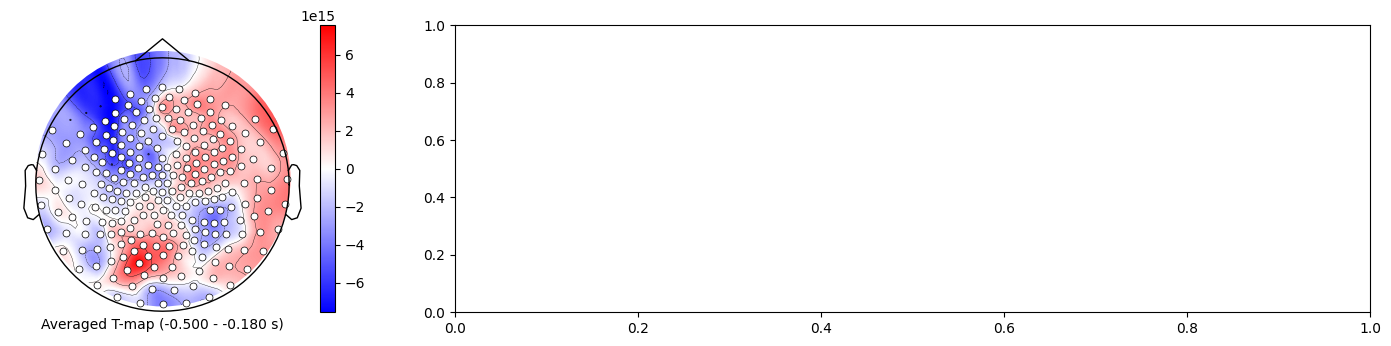

In [16]:
"""
Code adapted from : 
https://mne.tools/stable/auto_tutorials/stats-sensor-space/75_cluster_ftest_spatiotemporal.html
"""
T_obs, clusters, p_values, _ = cluster_stats

p_accept = 0.01
good_cluster_inds = np.where(p_values < p_accept)[0]

# configure variables for visualization
colors = "r",'steelblue'
linestyles = '-', '--'

times = contrast.times * 1e3

# loop over clusters
for i_clu, clu_idx in enumerate(good_cluster_inds):
    
    # unpack cluster information, get unique indices
    time_inds, space_inds = np.squeeze(clusters[clu_idx])
    ch_inds = np.unique(space_inds)
    time_inds = np.unique(time_inds)
    

    sig_times = contrast.times[time_inds]

    # get topography for F stat
    t_map = T_obs[time_inds, ...].mean(axis=0)

    # get signals at the sensors contributing to the cluster
    sig_times = contrast.times[time_inds]

    # create spatial mask
    mask = np.zeros((t_map.shape[0], 1), dtype=bool)
    mask[ch_inds, :] = True

    # initialize figure
    fig, ax_topo = plt.subplots(1, 1, figsize=(17, 5))

    # plot average test statistic and mark significant sensors
    t_evoked = mne.EvokedArray(t_map[:, np.newaxis], contrast.info, tmin=0)

    t_evoked.plot_topomap(times=0, mask=mask, axes=ax_topo, cmap='bwr',
                          cnorm = matplotlib.colors.CenteredNorm(vcenter=0), show=False,
                          colorbar=False, mask_params=dict(markersize=10), extrapolate='head',
                         sphere=(0, 0.012, 0, 0.185))

    image = ax_topo.images[0]

    # remove the title that would otherwise say "0.000 s"
    ax_topo.set_title("")

    # create additional axes (for ERF and colorbar)
    divider = make_axes_locatable(ax_topo)
    
    # add axes for colorbar
    ax_colorbar = divider.append_axes('right', size='5%', pad=0.05)
    plt.colorbar(image, cax=ax_colorbar)
    ax_topo.set_xlabel(
        'Averaged T-map ({:0.3f} - {:0.3f} s)'.format(*sig_times[[0, -1]]))

    # add new axis for time courses and plot time courses
    ax_signals = divider.append_axes('right', size='300%', pad=1.2)

    # TODO add color for noise around signal
    title = 'Cluster #{0}, {1} sensors (pval={2})'.format(i_clu + 1, len(ch_inds), p_values[clu_idx])
    
    plot_compare_evokeds(evokeds, title=title, picks=ch_inds, axes=ax_signals,
                     colors=colors, show=False,
                     split_legend=True, truncate_yaxis='auto', combine="mean")

    # plot temporal cluster extent
    ymin, ymax = ax_signals.get_ylim()
    ax_signals.fill_betweenx((ymin, ymax), sig_times[0], sig_times[-1],
                         color='orange', alpha=0.3)
    # clean up viz
    mne.viz.tight_layout(fig=fig)
    fig.subplots_adjust(bottom=.05)
    #plt.savefig(FIG_PATH + 'clusters-erp/sub-all_run-all_task-{}_cond-{}_meas-Ttest-cluster_erp{}.png'.format(task, conditions, i_clu))